In [2]:
# Name: John Lu
# Student ID: 21796268

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import mltools as ml
import data

%matplotlib inline

### Some Utility Functions

In [4]:
def plot_predictions(lr, X, xlabel="", ylabel="", title=""):
    """
    Inputs:
        lr - trained linear regression model
        X - Data to make predictions on
    
    This functions plots the given data with the predictions
    made by the linear regression model
    """
    predict_trn = lr.predict(X)
    plt.plot(X[:,0], predict_trn)
    ax = plt.gca()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

In [5]:
def plot_polynomial_function(lr, degree=1, scale=None):
    """
    Inputs:
        lr - trained linear regression model
        degree - the highest degree polynomial feature
        scale - (optional) used to reproduce scaling transformation
        
    Plots the fitted polynomial function.
    """
    # Generate x values
    xs = np.linspace(0, 10, 200)
    
    # Calculate the powers of x up to inputted degree
    Xpoly = np.zeros((xs.shape[0], degree))
    for i in range(degree):
        Xpoly[:,i] = xs ** (i+1)
    
    # Rescale
    Xpoly, _ = ml.transforms.rescale(Xpoly, scale)
    
    # Generate predictions using all powers of x up to "degree"
    # and plot against x.
    predictions = lr.predict(Xpoly)
    plt.plot(xs, predictions)
    
    ax = plt.gca()
    ax.set_ylim(ymin=-5, ymax=15)
    
    return ax

# Problem 1: Linear Regression

## Part 1

In [6]:
data = np.genfromtxt('data/curve80.txt')

In [7]:
X = data[:,0]
print(X[:5])

# code expects shape (M,N) so make sure it's 2-dimensional Y = data[:,1]
X = np.atleast_2d(X).T 
print(X[:5])

Y = data[:, 1]
print(Y[:5])

Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

[ 3.4447005  4.7580645  6.4170507  5.7949309  7.7304147]
[[ 3.4447005]
 [ 4.7580645]
 [ 6.4170507]
 [ 5.7949309]
 [ 7.7304147]]
[-0.88011696  0.46491228  3.7397661   3.0087719   2.9210526 ]


In [8]:
print(Xtr.shape)
print(Xte.shape)
print(Ytr.shape)
print(Yte.shape)

(60, 1)
(20, 1)
(60,)
(20,)


## Part 2

In [9]:
# create and train model
lr = ml.linear.linearRegress( Xtr, Ytr ) 

# densely sample possible x-values
xs = np.linspace(0,10,200)

# force "xs" to be an Mx1 matrix (expected by our code) 
xs = xs[:,np.newaxis]

# make predictions at xs
ys = lr.predict( xs )

### (a) Plot the training data points along with your prediction function in a single plot

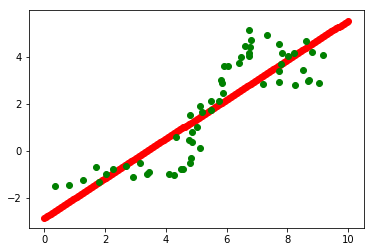

In [10]:
_, ax = plt.subplots()
ax.scatter(xs, ys, color='r', label='prediction function')
ax.scatter(Xtr, Ytr, color='g', label='Training Data')

### (b) Print the linear regression coefficients and verify that they match your plot.

In [11]:
print(lr.theta)

[[-2.82765049  0.83606916]]


An intercept of -2.823 and slope of 0.836 match the plot in part (a). By inspection, an intercept of -2.823 appears correct. To verify the slope, we shall use the linear regressor to make a prediction at x = 2. Based on the graph, the prediction should be between -2 and -1 (closer to -1) 

In [12]:
print(lr.predict(np.array([[2]])))

[[-1.15551217]]


### (c) What is the mean squared error of the predictions on the training and test data?

LinearRegress class inherits from regressor, which has an mse method.

In [13]:
print("mse (train): " + str(lr.mse(Xtr, Ytr)))
print("mse (test): " + str(lr.mse(Xte, Yte)))

mse (train): 1.12771195561
mse (test): 2.24234920301


Just to verify, we'll do it manually also.

In [14]:
def MSE(Predictions, Y_true):
    Predictions = np.squeeze(Predictions)
    Y_true = np.squeeze(Y_true)
    return ((Y_true - Predictions) ** 2).sum() / len(Y_true)

In [15]:
preds = lr.predict(Xtr)
print(MSE(preds, Ytr))

preds = lr.predict(Xte)
print(MSE(preds, Yte))

1.12771195561
2.24234920301


## Part 3

Try fitting y = f (x) using a polynomial function f (x) of increasing order. Do this by the trick of adding additional polynomial features before constructing and training the linear regression object. You can do this easily yourself; you can add a quadratic feature of Xtr with

Below is a plot of of our model trained with on features $x$ and $x^2$ and a bias.

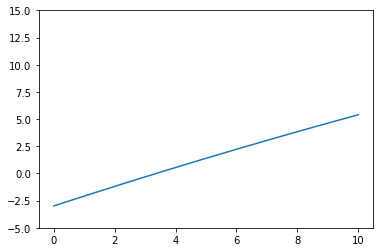

In [16]:
degree = 2
Xtr_deg2 = ml.transforms.fpoly(Xtr, degree, bias=False)

# Scale the features
Xtr_deg2_scaled, params = ml.transforms.rescale(Xtr_deg2)

# Train the model
lr = ml.linear.linearRegress(Xtr_deg2_scaled, Ytr)

# Plot the function
plot_polynomial_function(lr, degree=degree, scale=params)

We now train polynomial regression models of degree d = [1,3,5,7,10,18]

In [17]:
degrees = [1,3,5,7,10,18]
models = {}
for d in degrees:
    Xtr_deg_d = ml.transforms.fpoly(Xtr, d, bias=False)
    Xtr_deg_d_scaled, scale = ml.transforms.rescale(Xtr_deg_d)
    lr = ml.linear.linearRegress(Xtr_deg_d_scaled, Ytr)
    
    # Save the model. Also store the scaling parameters to
    # scale test data later.
    models[d] = (lr, scale)

### (a) For each model, plot the learned prediction function $f(x)$

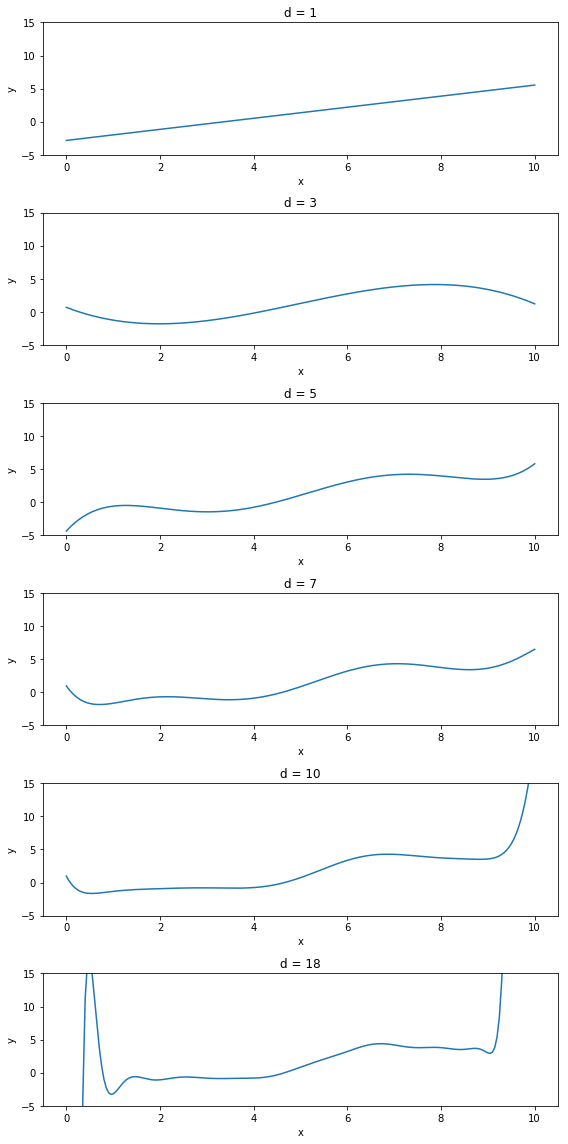

In [18]:
num_models = len(models)
model_num = 1

plt.figure(figsize=(8,16))
for deg, (model, scale) in models.items():
    plt.subplot(num_models, 1, model_num)
    plot_polynomial_function(model, degree=deg, scale=scale)
    
    # Add labels and title
    ax = plt.gca()
    ax.set_title('d = ' + str(deg))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    model_num = model_num + 1
    
plt.tight_layout()

### (b) Plot the training and test errors on a log scale (semilogy) as a function of the model degree.

In [19]:
# Save the train and test errors as 2-tuples, where the first
# element is the degree of the fitted polynomial, and the 2nd
# element is the error.
train_errors = []
test_errors = []

for deg, (model, scale) in models.items():
    # Generate the Polynomial Features for train and test data
    Xpoly_tr = ml.transforms.fpoly(Xtr, deg, bias=False)
    Xpoly_te = ml.transforms.fpoly(Xte, deg, bias=False)
    
    # Scale the training and test data using the correct
    # scaling parameters
    Xtr_scaled, _ = ml.transforms.rescale(Xpoly_tr, scale)
    Xte_scaled, _ = ml.transforms.rescale(Xpoly_te, scale)
    
    # ------------- Training Error --------------
    train_err = model.mse(Xtr_scaled, Ytr)
    train_errors.append((deg, train_err))
    
    # --------------- Test Error ----------------
    test_err = model.mse(Xte_scaled, Yte)
    test_errors.append((deg, test_err))
    
    


Verify that we got the same answer as before for degree 1 (from part 2c)

In [20]:
print('deg1 train error: ' + str(train_errors[0][1]))
print('deg1 test error1: ' + str(test_errors[0][1]))

deg1 train error: 1.12771195561
deg1 test error1: 2.24234920301


Let's plot the errors!

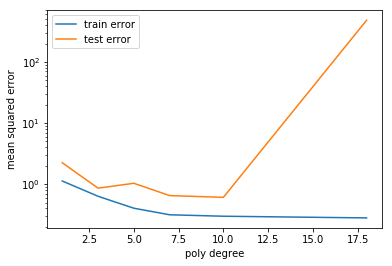

In [21]:
degs, train_errors = zip(*train_errors)
_, test_errors = zip(*test_errors)

plt.semilogy(degs, train_errors, label='train error')
plt.semilogy(degs, test_errors, label='test error')

ax = plt.gca()
ax.set_xlabel('poly degree')
ax.set_ylabel('mean squared error')
plt.legend()

### (c) What polynomial degree do you recommend?

Based on the above plot, I recommend a polynomial of degree 10, where both the training and test errors reach a minimum.

# Problem 2: Cross-validation

Find the 5-fold cross-validation MSE of linear regression at the same degrees as before, d = 1, 3, 5, 7, 10, 18. To make your code more readable, write a function that takes the degree and number of folds as arguments, and returns the cross-validation error.

In [22]:
def cross_validation_error(degree=1, num_folds=3):
    """
    This function takes a polynomial degree and number of folds
    to use in cross validation as input and returns the cross
    validation error
    """
    J = np.zeros((num_folds,))
    for iFold in range(num_folds):
        # Generate the Polynomial Features for train and test data
        Xpoly_tr = ml.transforms.fpoly(Xtr, deg, bias=False)
        Xpoly_tr_scaled, _ = ml.transforms.rescale(Xpoly_tr)
        
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xpoly_tr, Ytr, num_folds, iFold)
        
        # Train a linear regression model using Xti (already scaled)
        lr = ml.linear.linearRegress(Xti, Yti)
        
        # Calculate the mse on the on Xvi, Yvi
        J[iFold] = lr.mse(Xvi, Yvi)
    
    return J.mean()
        

## Part 1

Plot the five-fold cross-validation error as a function of degree

[1.211862662964198, 0.74290057520518005, 0.59107037265098472, 0.73356378093235075, 0.76770675021527401, 1.5121435028819601]


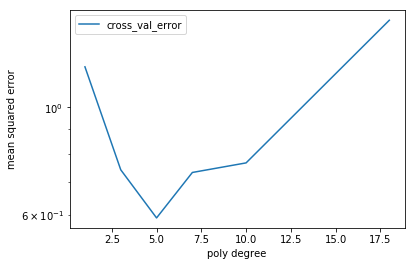

In [23]:
cross_val_errors = []
for deg in degrees:
    err = cross_validation_error(degree=deg, num_folds=5)
    cross_val_errors.append(err)

plt.semilogy(degrees, cross_val_errors, label="cross_val_error")

ax = plt.gca()
ax.set_xlabel('poly degree')
ax.set_ylabel('mean squared error')
plt.legend()

print(cross_val_errors)

## Part 2

The MSE estimates from the five-fold cross-validation are an order of magnitude lower than the MSEs evaluated on the actual test data.

## Part 3

Based on the five-fold cross-validation error plot, I would recommend polynomial degree = 5

## Part 4

Using the degree picked in part 3, plot the cross-validation error as the number of folds vary. What pattern do you observe?

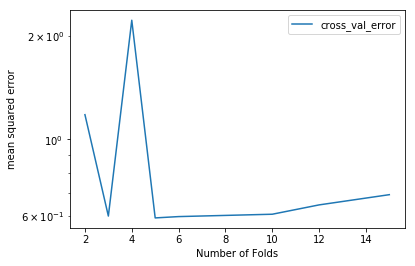

In [27]:
num_folds = [2, 3, 4, 5, 6, 10, 12, 15]
deg = 5

cross_val_errors = []
for num_fold in num_folds:
    err = cross_validation_error(degree=deg, num_folds=num_fold)
    cross_val_errors.append(err)

plt.semilogy(num_folds, cross_val_errors, label="cross_val_error")
ax = plt.gca()
ax.set_xlabel('Number of Folds')
ax.set_ylabel('mean squared error')
plt.legend()

Let K be the number of folds.

The cross validation error seems to be volatile for small k and reaches a is low for k >= 5.

The fact that volatility is high on the lower K regime makes sense because for small K training is done on smaller subsets of the training data (i.e. each fold has less data to train on). Thus, one would expect that the training error for each fold is higher on average due to statistical variation of the data per fold.

Note: It is tempting to claim that "as the number of folds increases past k=5, the error increases." However, as a test, let's plot for a few more values beyone k=15 and see what happens. 

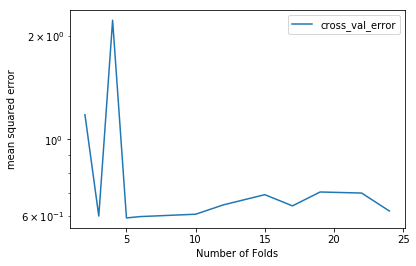

In [28]:
addtl_folds = [17, 19, 22, 24]
for num_fold in addtl_folds:
    err = cross_validation_error(degree=deg, num_folds=num_fold)
    cross_val_errors.append(err)
    
plt.semilogy(num_folds+addtl_folds, cross_val_errors, label="cross_val_error")
ax = plt.gca()
ax.set_xlabel('Number of Folds')
ax.set_ylabel('mean squared error')
plt.legend()

From the data, it is not obvious if the claim is true.

# Problem 3: Statement of Collaboration

I did not work with anyone else. All work in this notebook is my own.